In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
from matplotlib import pyplot as plt
from preprocessing import process_handwriting, data_import_handwriting
import numpy as np
from tensorflow.math import confusion_matrix


In [2]:
data_path = "./CS671-DLA-Assignment4-Data-2022/Handwriting_Data"
x_train, y_train, x_test, y_test = data_import_handwriting(data_path)
# print(x_train[3].shape)
x_max=np.nan
# x_train, x_max = padding_sequences(x_train)
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)
# print(y_train)
# x_test = padding_sequences(x_test)


In [3]:
x_train[100]

array([[0.15789411, 0.5416664 ],
       [0.13158041, 0.5416664 ],
       [0.10526274, 0.5416664 ],
       [0.07894904, 0.5416664 ],
       [0.02631767, 0.58332966],
       [0.        , 0.66666247],
       [0.05263137, 0.74999528],
       [0.10526274, 0.79166483],
       [0.21052548, 0.83333438],
       [0.26315685, 0.83333438],
       [0.26315685, 0.66666247],
       [0.21052548, 0.5416664 ],
       [0.15789411, 0.37500079],
       [0.13158041, 0.20833517],
       [0.10526274, 0.08333281],
       [0.13158041, 0.04166955],
       [0.18421178, 0.        ],
       [0.26315685, 0.04166955],
       [0.28947452, 0.08333281],
       [0.31578822, 0.12500236],
       [0.34210589, 0.16666562],
       [0.36841959, 0.20833517],
       [0.39473726, 0.20833517],
       [0.39473726, 0.16666562],
       [0.44736863, 0.12500236],
       [0.52631767, 0.08333281],
       [0.57894904, 0.12500236],
       [0.60526274, 0.20833517],
       [0.63158041, 0.41666405],
       [0.63158041, 0.58332966],
       [0.

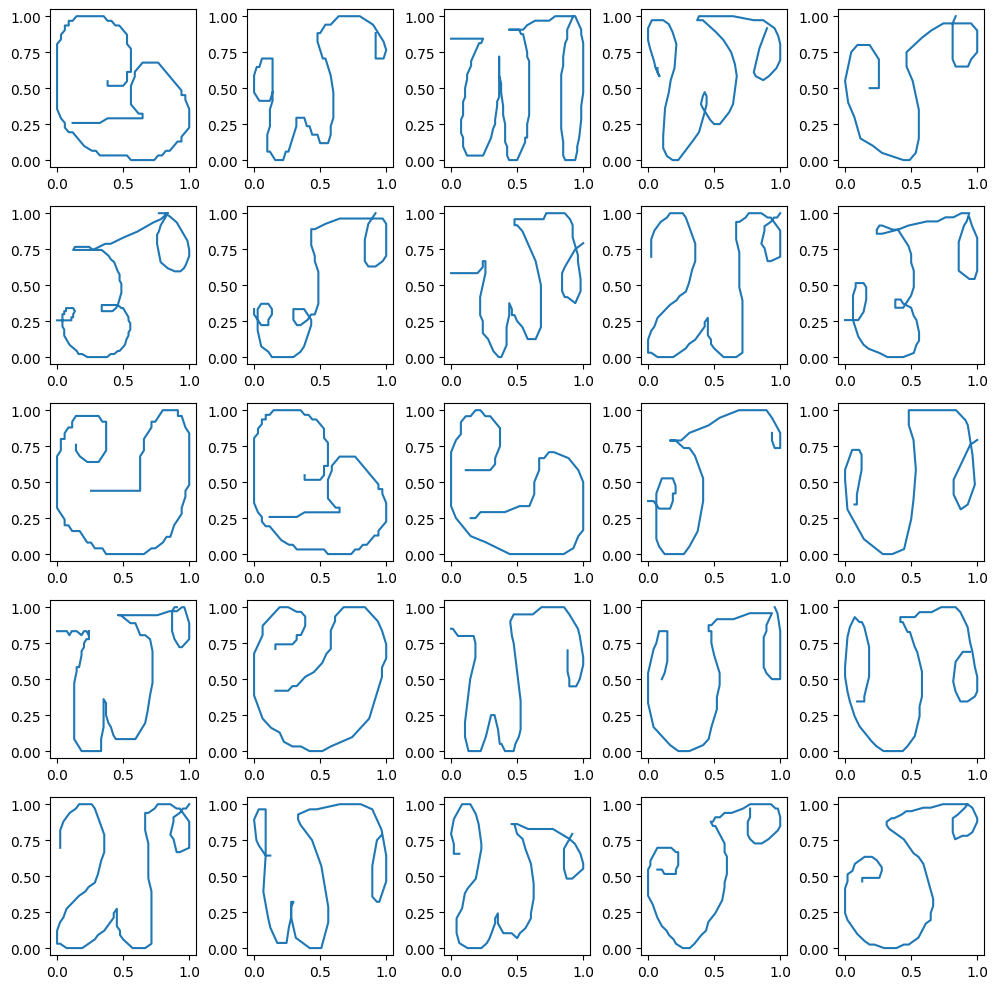

In [4]:
import matplotlib.pyplot as plt
rand_idx = np.random.randint(0,344,(25,))
plt.figure(figsize=(10,10))
for i, idx in enumerate(rand_idx):
    plt.subplot(5,5,i+1)
    plt.plot(x_train[idx][:, 0], x_train[idx][:, 1])
plt.tight_layout()
plt.show()

In [5]:
# x_train[0]

# Handwriting

## RNN-Architecture1

In [6]:
rnn = load_model("./models/handwriting_rnn1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 1,285
Trainable params: 1,285
Non-trainable params: 0
_________________________________________________________________


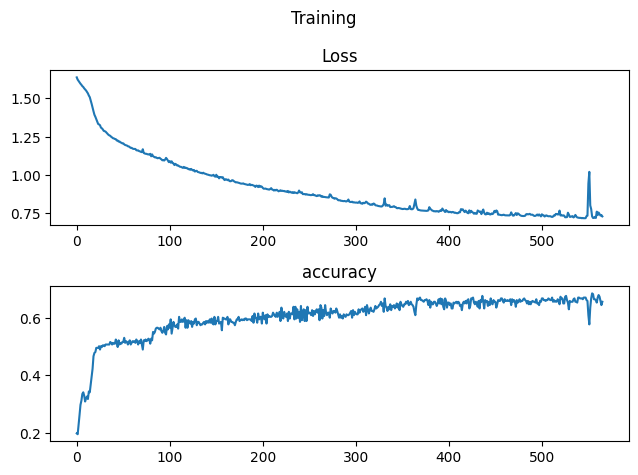

In [7]:
with open("./logs/hist_handrnn1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [8]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [9]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

 1/11 [=>............................] - ETA: 1s

2023-05-12 13:37:07.129092: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11/11 [==============================] - 0s 3ms/step
[[68  0  0  1  0]
 [ 0 15 46  4  2]
 [ 0 11 53  4  2]
 [ 0  1  5 30 32]
 [ 0  3  1  5 60]]


In [10]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 4ms/step - loss: 0.7275 - accuracy: 0.6589


[0.7275482416152954, 0.6588921546936035]

In [11]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6400


[0.6510818600654602, 0.6399999856948853]

In [12]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 3ms/step
[[20  0  0  0  0]
 [ 0  4 15  0  1]
 [ 0  4 16  0  0]
 [ 0  1  0  5 14]
 [ 0  0  0  1 19]]


## RNN-Architecture2

In [13]:
rnn = load_model("./models/handwriting_rnn2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 10)           130       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 80        
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


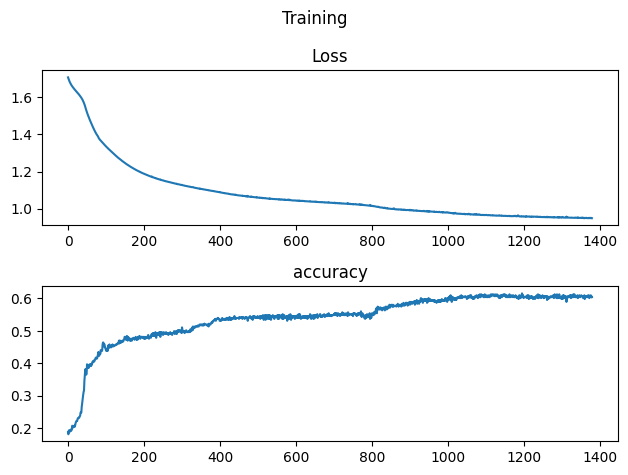

In [14]:
with open("./logs/hist_handrnn2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [15]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [16]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 5ms/step
[[69  0  0  0  0]
 [ 0 44  7  1 15]
 [ 0 18 39  0 13]
 [ 0 26 24  0 18]
 [ 0  7  7  0 55]]


In [17]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 5ms/step - loss: 0.9473 - accuracy: 0.6035


[0.9473011493682861, 0.6034985184669495]

In [18]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 5ms/step - loss: 1.0016 - accuracy: 0.5400


[1.001598834991455, 0.5400000214576721]

In [19]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 5ms/step
[[20  0  0  0  0]
 [ 0 13  2  0  5]
 [ 0  7  6  0  7]
 [ 0  8  2  0 10]
 [ 0  4  1  0 15]]


## RNN-Architecture3

In [20]:
rnn = load_model("./models/handwriting_rnn3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 64)           4288      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 200)               6600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1005  

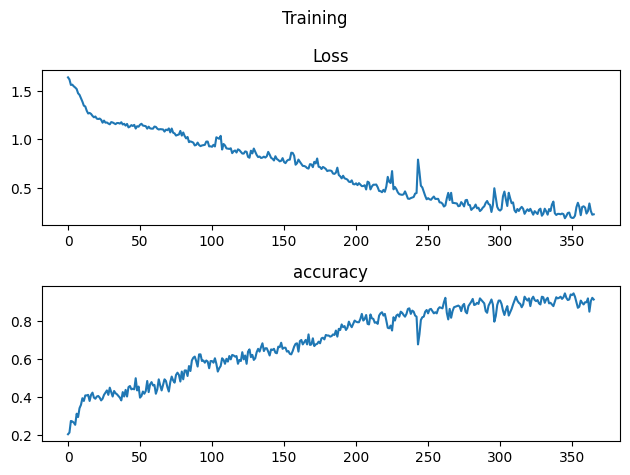

In [21]:
with open("./logs/hist_handrnn3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [22]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [23]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 7ms/step
[[69  0  0  0  0]
 [ 0 57  9  1  0]
 [ 0  7 63  0  0]
 [ 0  0  0 67  1]
 [ 0  0  0  1 68]]


In [24]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 8ms/step - loss: 0.1625 - accuracy: 0.9446


[0.16245394945144653, 0.9446064233779907]

In [25]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 7ms/step - loss: 0.3484 - accuracy: 0.8700


[0.34838688373565674, 0.8700000047683716]

In [26]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 7ms/step
[[20  0  0  0  0]
 [ 0 13  5  1  1]
 [ 0  3 17  0  0]
 [ 0  0  0 19  1]
 [ 0  1  0  1 18]]


## LSTM-Architecture1

In [27]:
rnn = load_model("./models/handwriting_lstm1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                4480      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 4,645
Trainable params: 4,645
Non-trainable params: 0
_________________________________________________________________


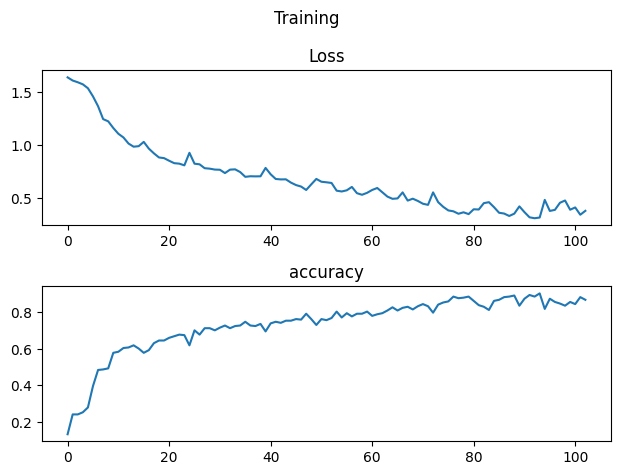

In [28]:
with open("./logs/hist_handlstm1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [29]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [30]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 6ms/step
[[69  0  0  0  0]
 [ 0 60  6  0  1]
 [ 0 17 53  0  0]
 [ 0  3  0 60  5]
 [ 0 10  1  0 58]]


In [31]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 6ms/step - loss: 0.3594 - accuracy: 0.8746


[0.35940515995025635, 0.8746355772018433]

In [32]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.3187 - accuracy: 0.8500


[0.31870925426483154, 0.8500000238418579]

In [33]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 5ms/step
[[20  0  0  0  0]
 [ 0 17  3  0  0]
 [ 0  4 16  0  0]
 [ 0  0  0 12  8]
 [ 0  0  0  0 20]]


## LSTM-Architecture2

In [34]:
rnn = load_model("./models/handwriting_lstm2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 10)           520       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 320       
                                                                 
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
Total params: 870
Trainable params: 870
Non-trainable params:

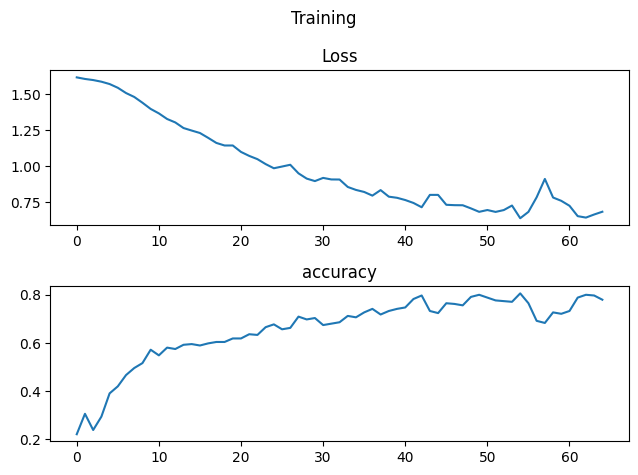

In [35]:
with open("./logs/hist_handlstm2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [36]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [37]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 8ms/step
[[63  0  0  6  0]
 [ 1 48  9  8  1]
 [ 0 17 48  2  3]
 [ 0  6  1 58  3]
 [ 0  3 13  4 49]]


In [38]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 9ms/step - loss: 0.6765 - accuracy: 0.7755


[0.676515519618988, 0.7755101919174194]

In [39]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 8ms/step - loss: 0.5742 - accuracy: 0.8300


[0.5742244720458984, 0.8299999833106995]

In [40]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 8ms/step
[[19  0  0  1  0]
 [ 0 17  1  2  0]
 [ 0  6 10  0  4]
 [ 0  0  0 20  0]
 [ 0  0  3  0 17]]


## LSTM-Architecture3

In [41]:
rnn = load_model("./models/handwriting_lstm3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 2)]          0         
                                                                 
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 200, 64)           17152     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 200)               6600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1005  

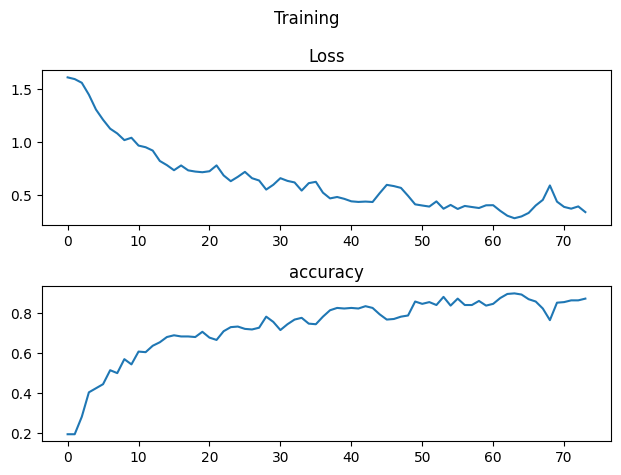

In [42]:
with open("./logs/hist_handlstm3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [43]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [44]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 1s 16ms/step
[[69  0  0  0  0]
 [ 0 60  5  0  2]
 [ 0 10 56  0  4]
 [ 0 11  0 57  0]
 [ 0  2  1  0 66]]


In [45]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 1s 16ms/step - loss: 0.3018 - accuracy: 0.8980


[0.3018144965171814, 0.8979591727256775]

In [46]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 14ms/step - loss: 0.2044 - accuracy: 0.9300


[0.20442567765712738, 0.9300000071525574]

In [47]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 14ms/step
[[20  0  0  0  0]
 [ 0 18  1  0  1]
 [ 0  4 16  0  0]
 [ 0  1  0 19  0]
 [ 0  0  0  0 20]]


# CV

In [48]:
from preprocessing import data_import_cv

In [49]:
x_train, y_train, x_test, y_test = data_import_cv("./CS671-DLA-Assignment4-Data-2022/CV_Data/")
mask_val=100_000.0
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=79)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=79)

y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [50]:
x_train_padded[0].shape

(79, 39)

## RNN-Architecture1

In [51]:
rnn = load_model("./models/cv_rnn1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6656      
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 6,981
Trainable params: 6,981
Non-trainable params: 0
_________________________________________________________________


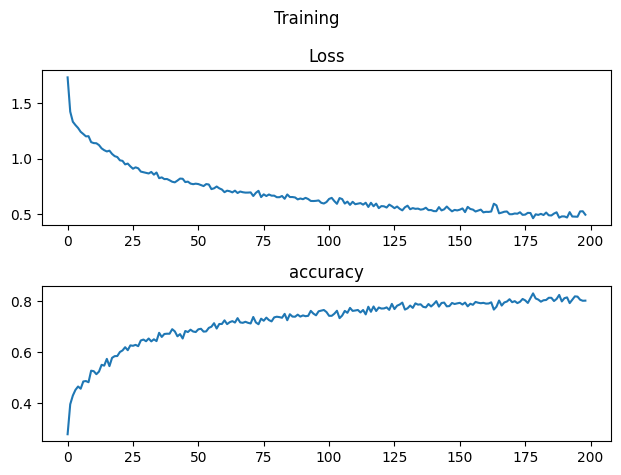

In [52]:
with open("./logs/hist_cvrnn1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [53]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 2ms/step
[[349  31  13  15   0]
 [ 88 379  20  20   3]
 [ 14   6 333  27   3]
 [  5   2  14 322   0]
 [  0   1   0   0 317]]


In [54]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8665


[0.3655305504798889, 0.866462767124176]

In [55]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 2ms/step - loss: 1.0983 - accuracy: 0.6029


[1.0983248949050903, 0.6028513312339783]

In [56]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 2ms/step
[[53 26  8 15  0]
 [51 47 14 11  4]
 [ 7  8 54 26  1]
 [ 4  2  9 67  4]
 [ 0  0  1  4 75]]


## RNN-Architecture2

In [57]:
rnn = load_model("./models/cv_rnn2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 32)            2304      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense (Dense)               (None, 5)                 85        
                                                                 
Total params: 3,173
Trainable params: 3,173
Non-trainable params: 0
_________________________________________________________________


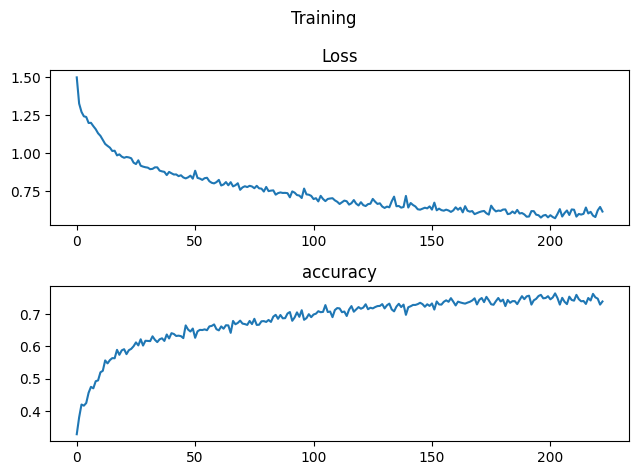

In [58]:
with open("./logs/hist_cvrnn2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [59]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 3ms/step
[[235 152   7  12   2]
 [106 373  24   4   3]
 [ 21  32 313   8   9]
 [  7   7   6 317   6]
 [  1   3   2   3 309]]


In [60]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7885


[0.5237526297569275, 0.7884811162948608]

In [61]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 3ms/step - loss: 0.8749 - accuracy: 0.6701


[0.8748807311058044, 0.6700611114501953]

In [62]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 3ms/step
[[41 51  4  6  0]
 [32 80  9  3  3]
 [ 8 17 61  7  3]
 [ 0  7  5 72  2]
 [ 0  0  3  2 75]]


## RNN-Architecture3

In [63]:
rnn = load_model("./models/cv_rnn3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 64)            6656      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645   

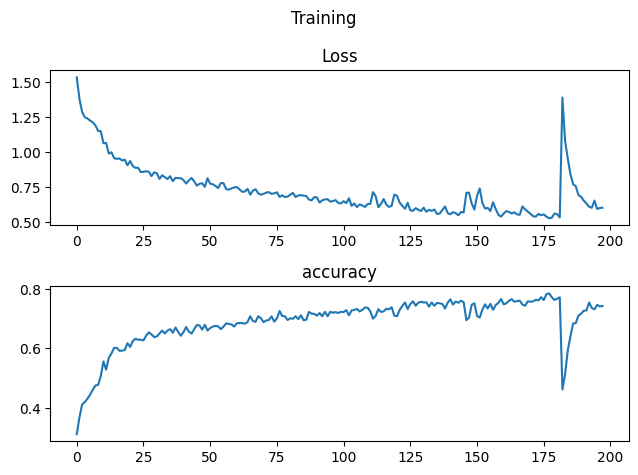

In [64]:
with open("./logs/hist_cvrnn3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [65]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 0s 3ms/step
[[178 202   3  25   0]
 [ 79 397  19  11   4]
 [ 14  21 334  13   1]
 [  1   4  12 325   1]
 [  1   2   0   2 313]]


In [66]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7885


[0.46266964077949524, 0.7884811162948608]

In [67]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 3ms/step - loss: 0.8714 - accuracy: 0.6640


[0.8713637590408325, 0.6639510989189148]

In [68]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 3ms/step
[[33 53  4 12  0]
 [26 86  7  5  3]
 [12 14 62  6  2]
 [ 0  7  4 73  2]
 [ 0  3  3  2 72]]


## LSTM-Architecture1

In [69]:
rnn = load_model("./models/cv_lstm1.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 64)                26624     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 26,949
Trainable params: 26,949
Non-trainable params: 0
_________________________________________________________________


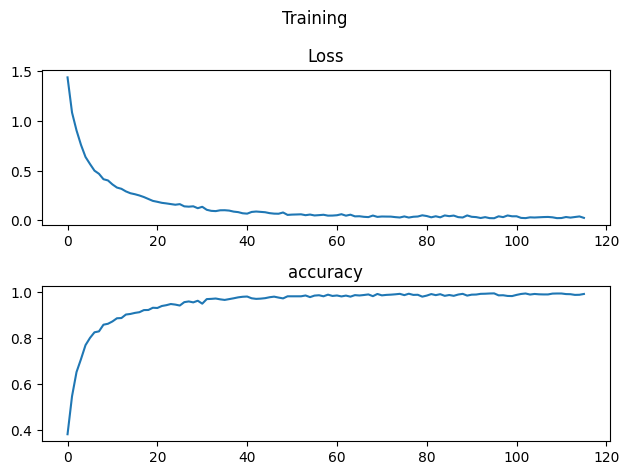

In [70]:
with open("./logs/hist_cvlstm1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [71]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 1s 4ms/step
[[408   0   0   0   0]
 [  0 510   0   0   0]
 [  0   0 383   0   0]
 [  0   0   0 343   0]
 [  0   0   0   0 318]]


In [72]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 1s 5ms/step - loss: 0.0044 - accuracy: 1.0000


[0.004421458579599857, 1.0]

In [73]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 5ms/step - loss: 0.8040 - accuracy: 0.8147


[0.8039793968200684, 0.8146639466285706]

In [74]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 4ms/step
[[89  9  0  4  0]
 [16 89 19  1  2]
 [ 2 13 76  3  2]
 [ 5  0  8 72  1]
 [ 0  0  4  2 74]]


## LSTM-Architecture2

In [75]:
rnn = load_model("./models/cv_lstm2.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 79, 32)            9216      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 5)                 85        
                                                                 
Total params: 12,437
Trainable params: 12,437
Non-trainable params: 0
_________________________________________________________________


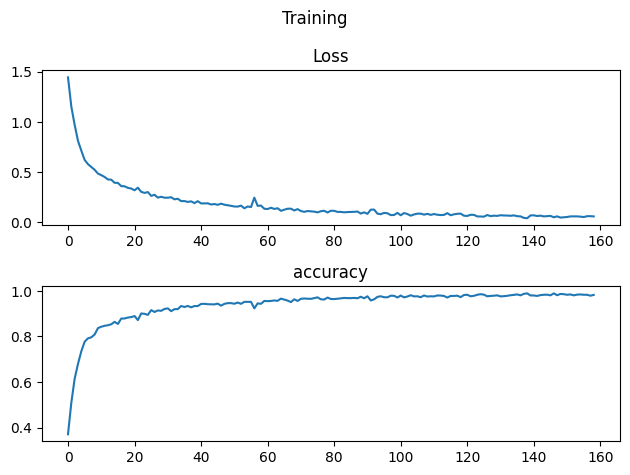

In [76]:
with open("./logs/hist_cvlstm2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [77]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 1s 5ms/step
[[408   0   0   0   0]
 [  0 509   1   0   0]
 [  0   0 383   0   0]
 [  0   0   0 343   0]
 [  1   0   0   0 317]]


In [78]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 1s 5ms/step - loss: 0.0093 - accuracy: 0.9990


[0.009281083010137081, 0.9989806413650513]

In [79]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 5ms/step - loss: 0.8018 - accuracy: 0.8371


[0.8018213510513306, 0.837067186832428]

In [80]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 5ms/step
[[96  3  0  3  0]
 [12 92 18  2  3]
 [ 5 18 69  2  2]
 [ 3  0  3 79  1]
 [ 0  1  2  2 75]]


## LSTM-Architecture3

In [81]:
rnn = load_model("./models/cv_lstm3.h5")
rnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 79, 39)]          0         
                                                                 
 masking (Masking)           (None, 79, 39)            0         
                                                                 
 lstm (LSTM)                 (None, 79, 64)            26624     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645   

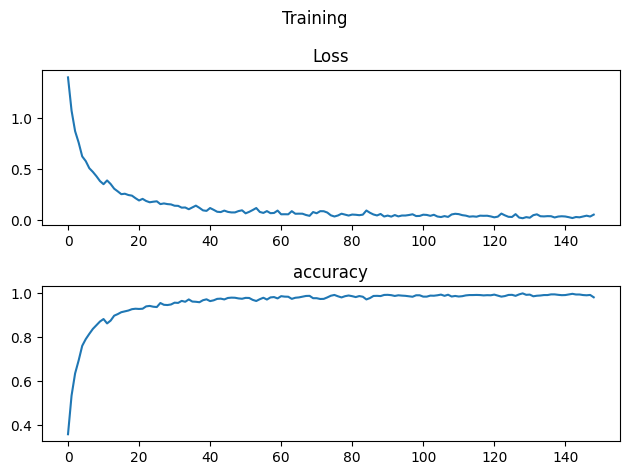

In [82]:
with open("./logs/hist_cvlstm3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [83]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

62/62 [==============================] - 1s 8ms/step
[[408   0   0   0   0]
 [  0 506   4   0   0]
 [  0   0 383   0   0]
 [  0   0   0 343   0]
 [  0   0   0   0 318]]


In [84]:
rnn.evaluate(x_train_padded, y_train)

62/62 [==============================] - 2s 8ms/step - loss: 0.0067 - accuracy: 0.9980


[0.006700374651700258, 0.9979612827301025]

In [85]:
rnn.evaluate(x_test_padded, y_test)


16/16 [==============================] - 0s 7ms/step - loss: 0.9299 - accuracy: 0.8554


[0.9298816919326782, 0.8553971648216248]

In [86]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

16/16 [==============================] - 0s 7ms/step
[[91  7  0  2  2]
 [ 9 92 21  2  3]
 [ 2  5 85  3  1]
 [ 4  0  6 74  2]
 [ 0  0  2  0 78]]
